# Netflix Content Analysis Project 🎬

In this project, a Netflix dataset from Kaggle was analyzed.  
The goal is to explore content types, yearly distribution, country-wise production, and the most popular genres.

## 🔹 1. Importing Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Jupyter için grafik ayarı
%matplotlib inline


## 🔹 2. Loading the Data


In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🔹 3. Cleaning Missing Data


In [3]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'], inplace=True)

<ipython-input-3-4bf6ba9cd1c4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-3-4bf6ba9cd1c4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

## 🔹 4. Content Count by Year


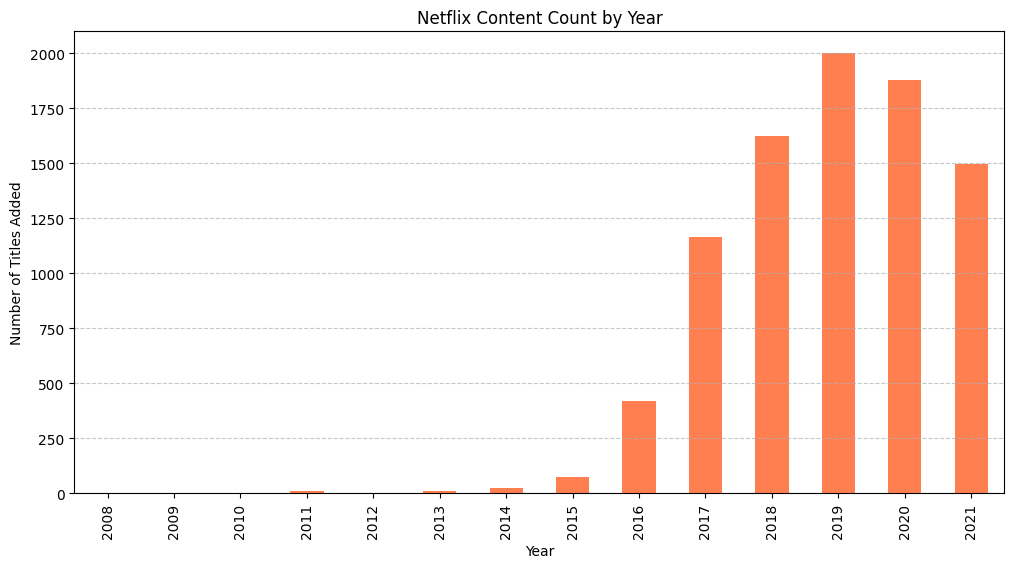

In [5]:
df['year_added'] = df['date_added'].dt.year
content_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
content_by_year.plot(kind='bar', color='coral')
plt.title('Netflix Content Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 🔹 5. Film vs Dizi Ratio


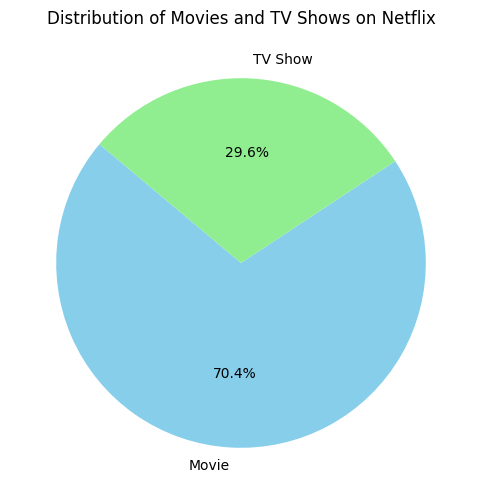

In [6]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.ylabel('')
plt.show()


## 🔹 6. Countries with the Most Content


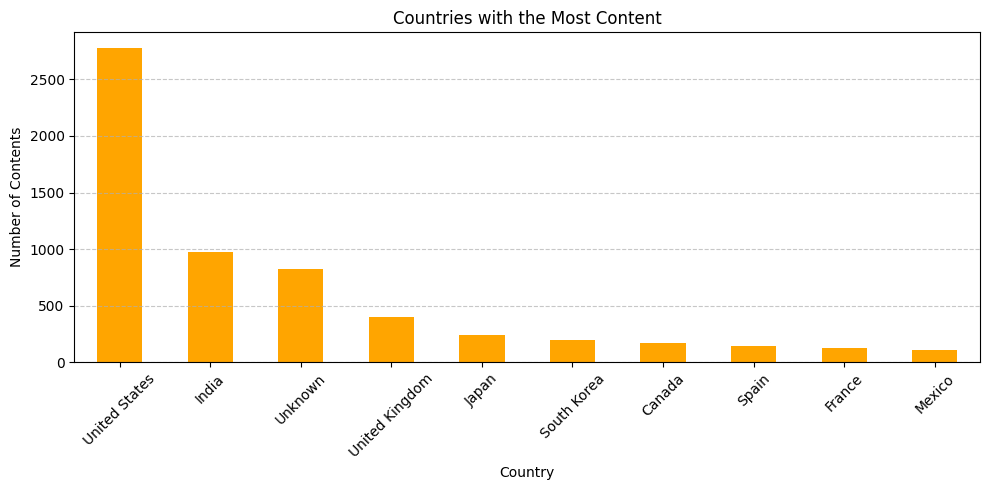

In [7]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='orange')
plt.title('Countries with the Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Contents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 🔹 7. Most Popular Genres


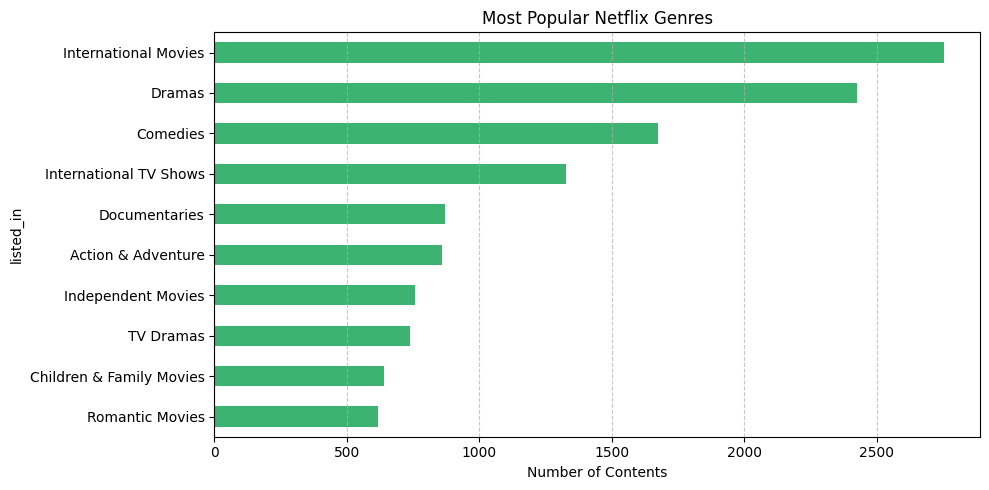

In [8]:
genre_series = df['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = genre_series.explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,5))
top_genres.plot(kind='barh', color='mediumseagreen')
plt.title('Most Popular Netflix Genres')
plt.xlabel('Number of Contents')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## ✅ Conclusion and Evaluation

- Netflix has rapidly increased its content volume in recent years (with a slight drop during the pandemic period).
- Movies make up a slightly larger portion compared to TV shows.
- The United States leads significantly in content production.
- The most popular genres are: International Movies, Dramas, and Comedies.